In [2]:
import pandas as pd

import numpy as np

import re

data=pd.read_csv("persons.csv")



In [3]:
Valid_countries=['France','Madagascar','Benin','Germany','Canada']

def check_country(country):
    if country not in Valid_countries:
        print(' - "{}" is not a valid country,we delete it.'.format(country))
        return np.NaN
    return country
        
        

In [4]:
def first(string):
    parts=string.split(',')
    first_part=parts[0]
    if len(parts)>=2:
        print(' - There is several parts in "{}", we are only keeping {}'.format(parts,first_part))
    return first_part    
        

In [5]:
def convert_height(height):
    found = re.search('\d\.\d{2}m', height)
    if found is None:
        print('{} is not in the right format. It will be ignored.'.format(height))
        return np.NaN
    else:
        value = height[:-1] # the last character is removed: 'm'
        return float(value)

def fill_height(height, replacement):
    if pd.isnull(height):
        print('Imputation by the mean : {}'.format(replacement))
        return replacement
    return height

In [6]:
data['email']=data['email'].apply(first)
data['country']=data['country'].apply(check_country)
data['height']=[convert_height(t) for t in data['height']]
data['height']=[t if t<3 else np.NAN for t in data['height']]

men_height=data['height'].mean()
data['height']=[fill_height(t,men_height) for t in data['height']]
data['date_of_birth']=pd.to_datetime(data['date_of_birth'],format='%d/%m/%Y',errors='coerce')
data

 - There is several parts in "['marco23@example.com', ' mc23@supermail.eu']", we are only keeping marco23@example.com
 - "nan" is not a valid country,we delete it.
 - "24" is not a valid country,we delete it.
153cm is not in the right format. It will be ignored.
Imputation by the mean : 1.52
Imputation by the mean : 1.52


,first name,email,date_of_birth,country,height
0,Leila,leila@example.com,1990-01-23,France,1.49
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
2,Rodney,choupipoune@supermail.eu,NaT,Madagascar,1.52
3,Marc,marco23@example.com,1978-02-10,NaN,1.65
4,Harry,helloworld@supermail.eu,NaT,Germany,1.34
5,Hanna,hannah2019@supermail.eu,1970-01-01,Canada,1.52
6,samuël,samuel_329@example.com,NaT,Benin,1.45


In [8]:
import matplotlib.pyplot as plt 

import seaborn as sns
data=pd.read_csv("operations.csv",parse_dates=[0])
data

,transaction_date,label,amount,balance_bef_trn,categ,type,expense_slice,debcr,year,month,day,day_week,day_week_num,weekend,quart_month
0,2023-03-31,DONATION XX XX XX XX XX XX XX,-1.44,1515.25,OTHER,DONATION,small,debit,2023,3,31,Friday,5,False,4
1,2023-04-03,PAYMENT XX XX MTA XX,-24.00,1513.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
2,2023-04-03,PAYMENT XX XX MTA XX,-73.00,1489.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
3,2023-04-03,PAYMENT XX XX XX XX,-14.39,1416.81,OTHER,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
4,2023-04-03,TRANSFER XX XX XX XX XX XX,4.80,1402.42,OTHER,TRANSFER,(not an expense),credit,2023,4,3,Monday,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2023-10-05,PAYMENT XX XX XX XX,-4.80,2440.94,OTHER,PAYMENT,small,debit,2023,10,5,Thursday,4,False,1
304,2023-10-05,PAYMENT XX XX XX XX XX XX,-10.64,2436.14,OTHER,PAYMENT,small,debit,2023,10,5,Thursday,4,False,1
305,2023-10-06,PRE-AUTH PAYMENT XX TELEPHONE XX XX,-13.58,2425.50,TELEPHONE BILL,OTHER,small,debit,2023,10,6,Friday,5,False,1
306,2023-10-06,PAYMENT XX XX CHEZ LUC XX,-10.00,2411.92,RESTAURANT,PAYMENT,small,debit,2023,10,6,Friday,5,False,1


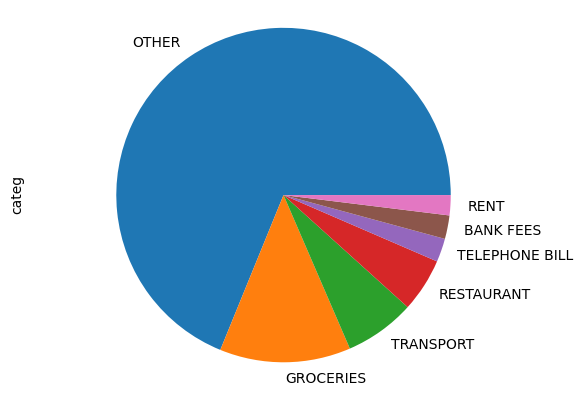

In [9]:
#qualitive variable
#Pie chart
#normalize=True give us empirical distribution

data['categ'].value_counts(normalize=True).plot(kind='pie')
plt.axis("equal")
plt.show()


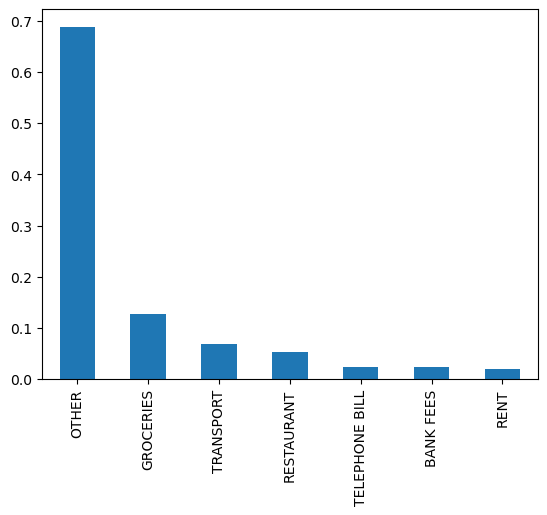

In [10]:
data['categ'].value_counts(normalize=True).plot(kind='bar')
plt.show()

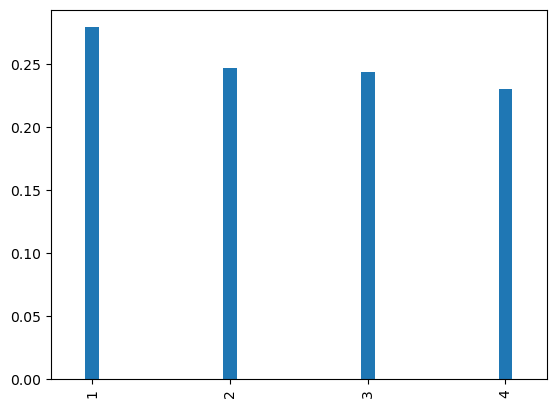

In [12]:
#quantitative variable
data['quart_month'].value_counts(normalize=True).plot(kind='bar',width=0.1)

plt.show()

AttributeError: 'Rectangle' object has no property 'normed'

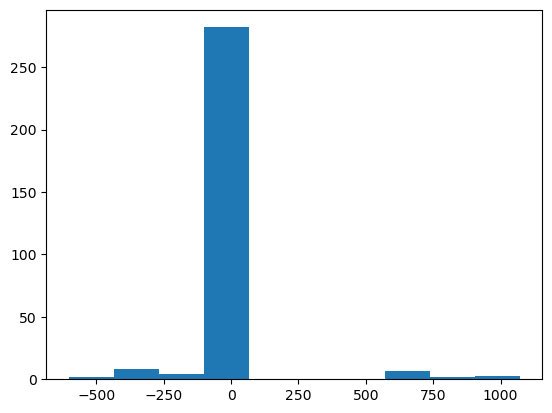

In [13]:
data['amount'].hist(normed=True)

plt.show()

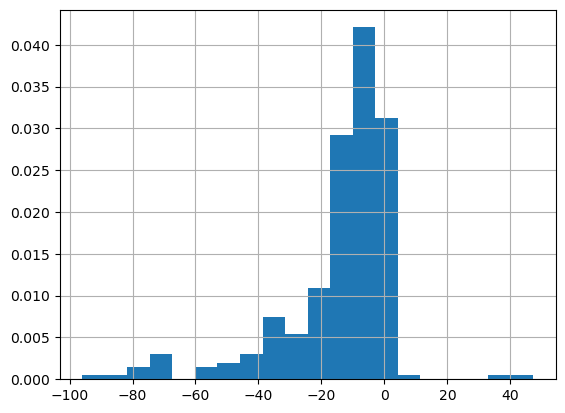

In [14]:
data[data.amount.abs()<100]["amount"].hist(density=True,bins=20)
plt.show()

In [17]:
occurances=data['quart_month'].value_counts()
categories=occurances.index
tab=pd.DataFrame(categories,columns=['quart_month'])
tab['n']=occurances.values
tab['f']=tab["n"]/len(data)
tab

,quart_month,n,f
0,1,86,0.279221
1,2,76,0.246753
2,3,75,0.243506
3,4,71,0.230519


In [20]:
tab=tab.sort_values("quart_month")
tab['F']=tab['f'].cumsum()
tab

,quart_month,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000
